In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/custom/dogData.csv
/kaggle/input/custom/catData.csv
/kaggle/input/assn3assn3/Dataset-1b/Test-10.csv
/kaggle/input/assn3assn3/Dataset-1b/Val-10.csv
/kaggle/input/assn3assn3/Dataset-1b/Train-10.csv
/kaggle/input/assn3assn3/Dataset-1a/Val-35.csv
/kaggle/input/assn3assn3/Dataset-1a/Test-35.csv
/kaggle/input/assn3assn3/Dataset-1a/Train-35.csv
/kaggle/input/assn3assn3/Dataset-2/val_label.csv
/kaggle/input/assn3assn3/Dataset-2/val_data.csv
/kaggle/input/assn3assn3/Dataset-2/train_data.csv
/kaggle/input/assn3assn3/Dataset-2/test_data.csv
/kaggle/input/assn3assn3/Dataset-2/test_label.csv
/kaggle/input/assn3assn3/Dataset-2/train_label.csv


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.cm as cwarm
from matplotlib.gridspec import GridSpec

In [35]:
features,labels,num_class = preprocess("/kaggle/input/assn3assn3/Dataset-1b/Train-10.csv")

In [8]:
def preprocess(file_path,file_path_1=[]):
    # Creating a dataframe from the given input file
    file = pd.read_csv(file_path)    #uncomment this for dataset 1a and 1b
    #file = pd.read_csv(file_path,header = None)     #uncomment this for dataset 2
    new_labels = None
    
    df = pd.DataFrame(file)
    try:    #this executes only if second path is given
        file1 = pd.read_csv(file_path_1,header = None)
        df1 = pd.DataFrame(file1)
        df1.rename(columns = {df1.columns[0]:"label"},inplace = True)
        
        df = pd.concat([df,df1],axis = 1)
    except:
        pass
    data = np.array(df.values)
    
    features = data[:,1:-1]
    labels = data[:,-1]
    
    num_class = np.shape(np.unique(labels))[0]
    size = np.shape(labels)[0]
    for i in range(0,size):
        x = int(labels[i])
        zero_vec = [0 for i in range(0,num_class)]
        zero_vec[x] = 1
        if new_labels is None:
            new_labels = [zero_vec]
        else:
            new_labels.append(zero_vec)
    new_labels = np.array(new_labels)
    return features,new_labels,num_class

In [43]:
#to be deleted
def preprocess(file_path,file_path_1):
    new_labels = None
    new_test_labels = None
    file = pd.read_csv(file_path,header = None)     #comment this for dataset 2
    file_1 = pd.read_csv(file_path_1,header = None)     #comment this for dataset 2
    
    df = pd.DataFrame(file)
    df1 = pd.DataFrame(file_1)
    
    data = np.array(df.values)
    data = data.T
    test_data = data[50:]
    data = data[:50]
    size = np.shape(data)[0]
    test_size = np.shape(test_data)[0]
    labels = np.array([0 for i in range(0,size)])
    test_labels = np.array([0 for i in range(0,test_size)])
    
    data1 = np.array(df1.values)
    data1 = data1.T
    test_data1 = data1[50:]
    data1 = data1[:50]
    size_1 = np.shape(data1)[0]
    labels_1 = np.array([1 for i in range(0,size_1)])
    test_size1 = np.shape(test_data1)[0]
    test_labels1 = np.array([1 for i in range(0,test_size1)])
    
    data = np.vstack((data,data1))
    labels = np.hstack((labels,labels_1))
    
    for i in range(0,np.shape(labels)[0]):
        x = int(labels[i])
        zero_vec = [0 for i in range(0,2)]
        zero_vec[x] = 1
        if new_labels is None:
            new_labels = [zero_vec]
        else:
            new_labels.append(zero_vec)
    new_labels = np.array(new_labels)
    
    test_data = np.vstack((test_data,test_data1))
    test_labels = np.hstack((test_labels,test_labels1))
    for i in range(0,np.shape(test_labels)[0]):
        x = int(test_labels[i])
        zero_vec = [0 for i in range(0,2)]
        zero_vec[x] = 1
        if new_test_labels is None:
            new_test_labels = [zero_vec]
        else:
            new_test_labels.append(zero_vec)
    new_test_labels = np.array(new_test_labels)

    return data,new_labels,test_data,new_test_labels

In [30]:
#to be deleted
features,new_labels,test_features,test_labels = preprocess("/kaggle/input/custom/dogData.csv","/kaggle/input/custom/catData.csv")

IndexError: list assignment index out of range

In [48]:
def create_model(features,hl1_nodes,hl2_nodes,num_class,new_labels):
    input_dim = np.shape(features)[1]
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape = (input_dim,)),
        tf.keras.layers.Dense(hl1_nodes,activation = 'sigmoid'),
        tf.keras.layers.Dense(hl2_nodes,activation = 'sigmoid'),
        tf.keras.layers.Dense(num_class,activation = 'softmax')
        ])
    model.compile(optimizer = 'adam',loss = 'categorical_crossentropy')
    model.fit(features,new_labels,epochs = epoch, batch_size = 9, verbose=0)
    return model

In [1]:
#to be deleted
#model = create_model(features,30,30,2,new_labels)

In [37]:
x_min,x_max = features[:,0].min()-0.5 , features[:,0].max()+0.5
y_min,y_max = features[:,1].min()-0.5 , features[:,1].max()+0.5
x = np.linspace(x_min,x_max,45)
y = np.linspace(y_min,y_max,45)
xx,yy = np.meshgrid(x,y)
feature_space = np.c_[xx.ravel(),yy.ravel()]

model = create_model(features,9,9,2,labels,1)
nodes_plot(model,feature_space,1)

dense_36
9
dense_37
9
dense_38
2


<Figure size 1200x1800 with 0 Axes>

<Figure size 1200x1800 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

In [46]:
def nodes_plot(model,feature_space):
    layers_name = [layers.name for layers in model.layers]
    layers_nodes_no = [layers.output_shape[1] for layers in model.layers]

    del layers_name[0]
    del layers_nodes_no[0]
    for layer_name,hl_nodes in zip(layers_name,layers_nodes_no):
        print(layer_name)
        print(hl_nodes)
        q = divmod(hl_nodes,2)[0]
        r = divmod(hl_nodes,2)[1]
        if r == 1:
            q += 1
        fig = plt.figure(figsize = (12,hl_nodes*2))
        gs = GridSpec(q,2,width_ratios = [1,1],height_ratios = [1 for i in range(0,q)])
        for i in range(1,hl_nodes+1):
            q,r = divmod(i-1,2)
            node_output = model.get_layer(layer_name).output[:,i-1]
            output_function = tf.keras.backend.function(inputs=[model.input], outputs=[node_output])
            output = np.array(output_function([feature_space]))
            output = output.reshape(np.shape(xx))
    
            ax = fig.add_subplot(gs[q,r],projection='3d')
            ax.set_zlim(-1.01,1.01)
            surf = ax.plot_surface(xx,yy,output,cmap ='viridis')
            fig.colorbar(surf)
            plt.title("Node {}".format(i))
        fig.savefig("mlffnn_10_{}.pdf".format(layer_name))
        fig.clf()

In [20]:
def dec_region_plot(feature_space,num_class,phrase):
    class_colors = {0: 'red', 1: 'blue'}
    total_egs = 45 ** 2
    
    feature_sp_labels = model.predict(feature_space)
    feature_sp_labels = np.argmax(feature_sp_labels,axis = 1)
    
    feature_sp_labels = feature_sp_labels.reshape(np.shape(xx))
    #print(np.shape(feature_sp_labels))
    plt.contourf(xx,yy,feature_sp_labels,cmap = plt.cm.RdYlBu, alpha = 0.4)
    plt.savefig("region_{}.pdf".format(phrase))

842
64/64 [==============================] - 0s 1ms/step


NameError: name 'predicted_labels' is not defined

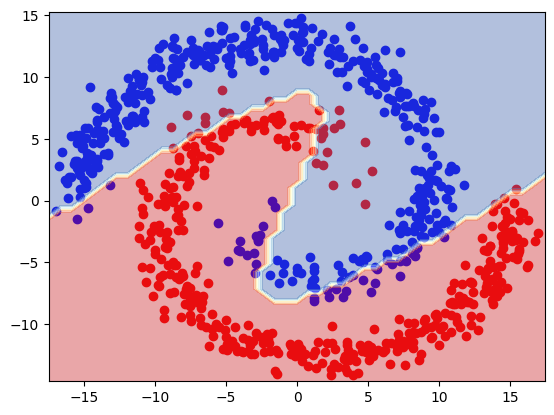

In [42]:
#labels = np.argmax(labels,axis = 1)
scatter_plot(features,labels)
dec_region_plot(feature_space,2,"test")
matrix_plot(labels,predicted_labels,2,"test")

In [19]:
def predict(model,features):
    predicted_labels = model.predict(features,verbose=0)
    predicted_labels = np.argmax(predicted_labels,axis = 1)
    return predicted_labels

In [38]:
def scatter_plot(features,actual_labels):
    total_egs = np.shape(features)[0]
    plt.clf()
    class_colors = {0: 'red', 1: 'blue'}
    k = 0
    for j in range(0,total_egs):
        plt.scatter(features[j][0],features[j][1], c = class_colors[actual_labels[k]])
        k += 1
    print(k)

2/2 [==============================] - 0s 5ms/step


15

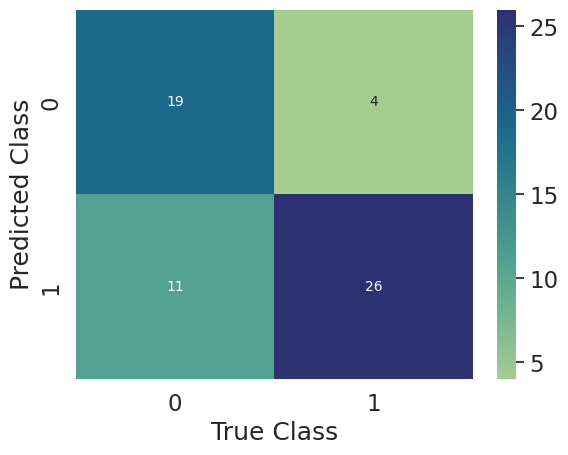

In [91]:
#to be deleted
predicted_labels = model.predict(test_features)
test_labels = np.argmax(test_labels,axis = 1)
predicted_labels = np.argmax(predicted_labels,axis = 1)
matrix_plot(test_labels,predicted_labels,2,"test")

4/4 [==============================] - 0s 2ms/step
0


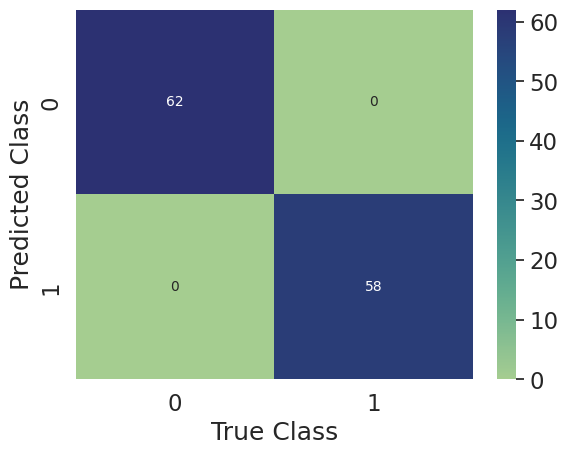

In [22]:
test_features,test_labels,num_class = preprocess("/kaggle/input/assn3assn3/Dataset-1b/Test-10.csv")
predicted_labels = model.predict(test_features)
print(matrix_plot(test_labels,predicted_labels,num_class,"test"))

In [21]:
def matrix_plot(actual_label_array,predicted_label_array,num_class,phrase):
    mistakes = 0
    numbers = np.shape(actual_label_array)[0]
    plot_matrix = np.zeros((num_class,num_class))
    for j in range(0,numbers):
        actual_class = int(actual_label_array[j])
        predicted_class = int(predicted_label_array[j])
        if (actual_class != predicted_class):
            mistakes += 1
        plot_matrix[predicted_class][actual_class] += 1
    sn.set(font_scale=1.5)
    mat = sn.heatmap(plot_matrix,annot=True,annot_kws={"size":10},cmap='crest',linecolor='black')
    mat.set(xlabel = 'True Class',ylabel = 'Predicted Class')
    plt.savefig("/kaggle/working/matrix_{}.pdf".format(phrase))
    return int((1-(mistakes/numbers))*10000000)/100000

In [ ]:
#img_features,img_labels,img_num_class = preprocess("/kaggle/input/assn3assn3/Dataset-2/train_data.csv","/kaggle/input/assn3assn3/Dataset-2/train_label.csv")
for i in range(1,11):
    for j in range(1,11):
        img_features,img_labels,img_num_class = preprocess("/kaggle/input/assn3assn3/Dataset-1b/Train-10.csv")
        model = create_model(img_features,j,j,img_num_class,img_labels)
        img_labels = np.argmax(img_labels,axis = 1)
        predict_labels = predict(model,img_features)
        train_acc = matrix_plot(img_labels,predict_labels,img_num_class,"test")

        img_features,img_labels,img_num_class = preprocess("/kaggle/input/assn3assn3/Dataset-1b/Val-10.csv")
        img_labels = np.argmax(img_labels,axis = 1)
        predict_labels = predict(model,img_features)
        val_acc = matrix_plot(img_labels,predict_labels,img_num_class,"test")
        print("\t{} & {} & {} & {} &  \\\\ \t \\hline".format(i,j,train_acc,val_acc))
#img_features = reduce_dim(img_features)
#predict_labels = predict(model,img_features)
#matrix_plot(img_labels,predict_labels,img_num_class,"test_red_dim")

	1 & 1 & 75.41567 & 71.0084 &  \\ 	 \hline
	1 & 2 & 75.77197 & 71.0084 &  \\ 	 \hline
	1 & 3 & 75.53444 & 71.0084 &  \\ 	 \hline
	1 & 4 & 76.12826 & 70.58823 &  \\ 	 \hline
	1 & 5 & 91.92399 & 86.97478 &  \\ 	 \hline
	1 & 6 & 91.92399 & 85.29411 &  \\ 	 \hline
	1 & 7 & 93.34916 & 87.81512 &  \\ 	 \hline
	1 & 8 & 97.14964 & 92.43697 &  \\ 	 \hline
	1 & 9 & 98.57482 & 97.05882 &  \\ 	 \hline
	1 & 10 & 98.09976 & 93.69747 &  \\ 	 \hline
	2 & 1 & 76.12826 & 72.2689 &  \\ 	 \hline
	2 & 2 & 88.8361 & 81.93277 &  \\ 	 \hline
	2 & 3 & 75.53444 & 72.68907 &  \\ 	 \hline
	2 & 4 & 75.6532 & 71.42857 &  \\ 	 \hline
	2 & 5 & 95.84323 & 91.59663 &  \\ 	 \hline
	2 & 6 & 91.92399 & 86.55462 &  \\ 	 \hline
	2 & 7 & 92.28028 & 86.97478 &  \\ 	 \hline
	2 & 8 & 97.14964 & 92.43697 &  \\ 	 \hline
	2 & 9 & 97.2684 & 93.27731 &  \\ 	 \hline
	2 & 10 & 97.74346 & 93.69747 &  \\ 	 \hline
	3 & 1 & 75.41567 & 71.0084 &  \\ 	 \hline
	3 & 2 & 75.6532 & 70.58823 &  \\ 	 \hline
	3 & 3 & 89.78622 & 83.61344 &  \\ 	 \h

In [48]:
def reduce_dim(features,test_features):
    cov = np.cov(features.T)
    eig_vals, eig_vecs = np.linalg.eig(cov)
    sorted_eigvals = np.sort(np.abs(eig_vals))
    X = np.argsort(np.abs(eig_vals))
    sum = np.sum(eig_vals)/20
    print(sorted_eigvals)
    
    eig_sum = 0
    count = 0
    for i in sorted_eigvals:
        if eig_sum < sum:
            eig_sum += i
        else:
            eig_sum -= i
            break
        count += 1

    remove_eigs = np.flip(np.sort(X[:count-1]))
    print(remove_eigs)
    print(np.shape(remove_eigs))
    for i in remove_eigs:
        features = np.delete(features,i,axis = 1)
        test_features = np.delete(test_features,i,axis = 1)
    return features,test_features

In [49]:
features,test_features = reduce_dim(features,test_features)
print(features)
print(np.shape(features))

[2.86386560e-16 6.74795333e-15 1.05465847e-14 ... 5.94422887e+03
 8.79842260e+03 1.43612018e+04]
[1023 1022 1021 1020 1019 1018 1017 1016 1015 1014 1013 1012 1011 1010
 1009 1008 1007 1006 1005 1004 1003 1002 1001 1000  999  998  997  996
  995  994  993  992  991  990  989  988  987  986  985  984  983  982
  981  980  979  978  977  976  975  974  973  972  971  970  969  968
  967  966  965  964  963  962  961  960  959  958  957  956  955  954
  953  952  951  950  949  948  947  946  945  944  943  942  941  940
  939  938  937  936  935  934  933  932  931  930  929  928  927  926
  925  924  923  922  921  920  919  918  917  916  915  914  913  912
  911  910  909  908  907  906  905  904  903  902  901  900  899  898
  897  896  895  894  893  892  891  890  889  888  887  886  885  884
  883  882  881  880  879  878  877  876  875  874  873  872  871  870
  869  868  867  866  865  864  863  862  861  860  859  858  857  856
  855  854  853  852  851  850  849  848  847  846 

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


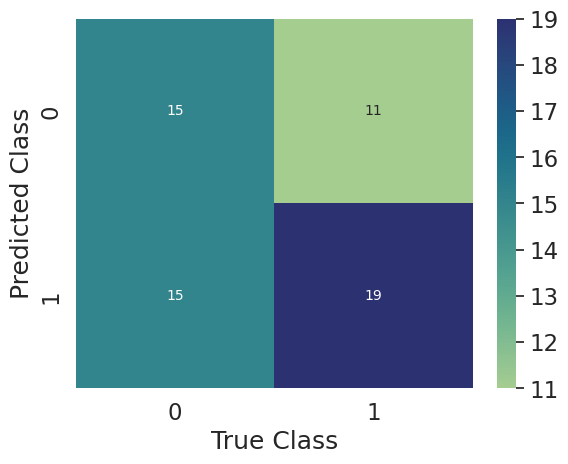

In [53]:
model = create_model(features,10,10,2,new_labels)

newest_labels = np.argmax(test_labels,axis = 1)
predict_labels = predict(model,test_features)
train_acc = matrix_plot(newest_labels,predict_labels,2,"test")